# Aya AbdElmoniem Mohamed
# 20221462478
# Intelligent Systems

# Import liberaries

In [48]:
# Importing numerical and data manipulation libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Read the data

In [49]:
books_df = pd.read_csv('/content/books.csv')

# Display first 5 columns

In [50]:
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


# Data cleaning

In [51]:
# count the number of missing values in the training dataset in each column and sorted in descending order
books_df.isna().sum()[books_df.isna().sum() != 0].sort_values(ascending=False)

language_code                109
isbn                          52
original_title                52
isbn13                        44
original_publication_year      3
dtype: int64

In [52]:
books_df = books_df.dropna()

In [53]:
books_df.isna().sum()[books_df.isna().sum() != 0].sort_values(ascending=False)

Series([], dtype: int64)

In [54]:
# Check for and handle duplicate values
books_df.T.duplicated()

book_id                      False
goodreads_book_id            False
best_book_id                 False
work_id                      False
books_count                  False
isbn                         False
isbn13                       False
authors                      False
original_publication_year    False
original_title               False
title                        False
language_code                False
average_rating               False
ratings_count                False
work_ratings_count           False
work_text_reviews_count      False
ratings_1                    False
ratings_2                    False
ratings_3                    False
ratings_4                    False
ratings_5                    False
image_url                    False
small_image_url              False
dtype: bool

we can see that there is not duplicated values in the data

# Analysis of Harry Potter Book series

In [55]:
# Data Cleaning and Preprocessing
# Filter the dataset to only include the Harry Potter book series
harry_potter_books = books_df[books_df['title'].str.contains('Harry Potter')]

In [77]:
ratings_list = ['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'average_rating']  # Selecting only numerical columns

# Displaying descriptive statistics for rating columns
_descriptive_stats = harry_potter_books[ratings_list].describe()
print(_descriptive_stats)

          ratings_1      ratings_2      ratings_3     ratings_4     ratings_5  \
count     10.000000      10.000000      10.000000  1.000000e+01  1.000000e+01   
mean   12498.500000   26248.400000  145720.400000  4.084476e+05  1.033430e+06   
std    22434.449023   29844.676198  136672.041798  3.459903e+05  8.778751e+05   
min      203.000000     186.000000     946.000000  3.593000e+03  6.332000e+03   
25%     2497.750000    6016.250000   33676.500000  1.189780e+05  3.893078e+05   
50%     7012.000000   20964.500000  144059.000000  4.767275e+05  1.143148e+06   
75%     9085.500000   29244.000000  176689.750000  5.058168e+05  1.248764e+06   
max    75504.000000  101676.000000  455024.000000  1.156318e+06  3.011543e+06   

       ratings_count  work_ratings_count  work_text_reviews_count  \
count   1.000000e+01        1.000000e+01                10.000000   
mean    1.535693e+06        1.626344e+06             29302.600000   
std     1.338120e+06        1.399453e+06             23399.4556

# Calculate the average rating of the Harry Potter books.

In [65]:
# Calculate the average rating of the Harry Potter books
print("The average rating of the Harry Potter books is:", (harry_potter_books['average_rating'] * harry_potter_books['ratings_count']).sum() / harry_potter_books['ratings_count'].sum())

The average rating of the Harry Potter books is: 4.489176670023024


<ipython-input-56-c6b880d6c9de>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=titles, y=harry_potter_books['average_rating'], palette="viridis")


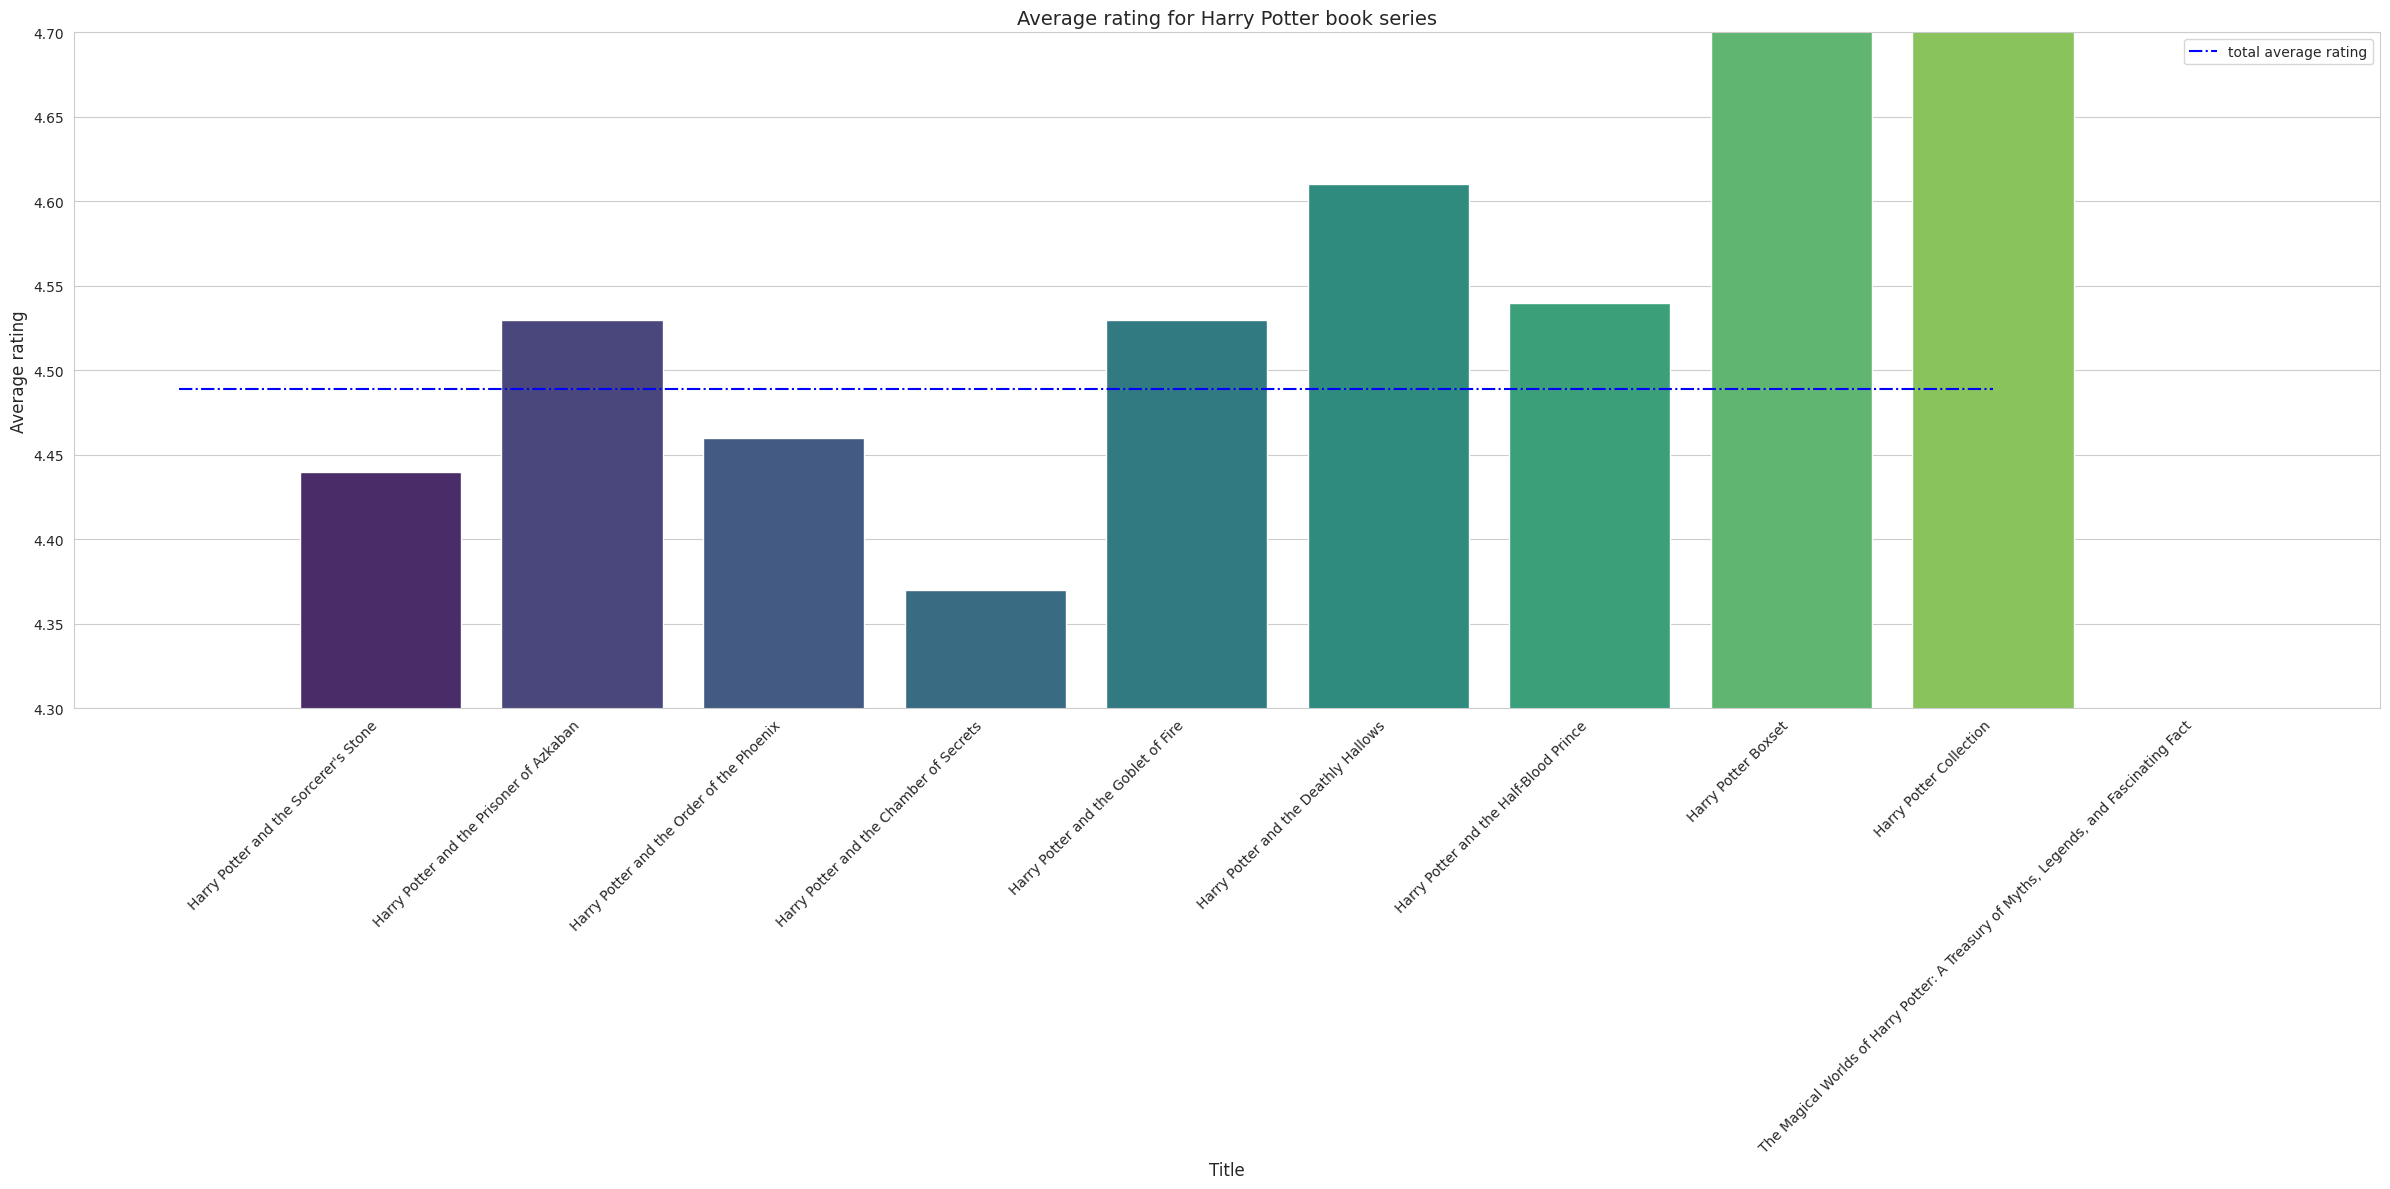

In [56]:
# Extracting titles from the DataFrame and removing any additional information in parentheses
titles = harry_potter_books['title'].tolist()
titles = [title[:title.find(' (')] for title in titles]
# Calculating the weighted average rating
weighted_avg = (harry_potter_books['average_rating'] * harry_potter_books['ratings_count']).sum() / harry_potter_books['ratings_count'].sum()
# Setting the style and creating the bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(24, 12))
sns.barplot(x=titles, y=harry_potter_books['average_rating'], palette="viridis")
plt.xlabel('Title', fontsize=12)
plt.ylabel('Average rating', fontsize=12)
plt.ylim((4.3, 4.7))
# Adding a horizontal line for the weighted average rating
plt.hlines(weighted_avg, xmin=-1, xmax=8, color='blue', linestyles='dashdot', label='total average rating')
plt.title('Average rating for Harry Potter book series', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

<Figure size 4800x2400 with 0 Axes>

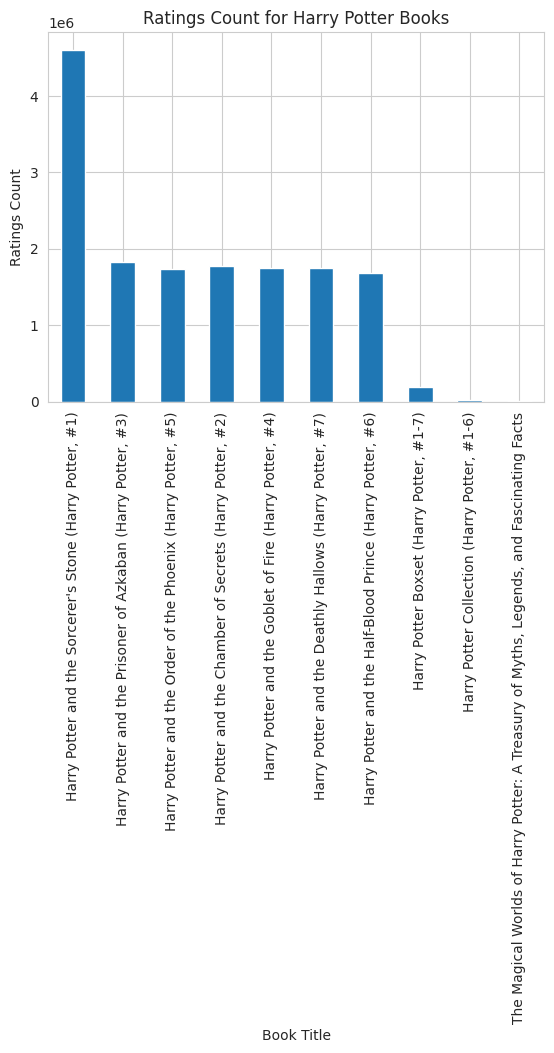

In [57]:
# Compare the ratings count for each book in the Harry Potter series
plt.figure(figsize=(48, 24))
harry_potter_books[['title', 'ratings_count']].plot(kind='bar', x='title', y='ratings_count', legend=False)
plt.title('Ratings Count for Harry Potter Books')
plt.xlabel('Book Title')
plt.ylabel('Ratings Count')
plt.show()

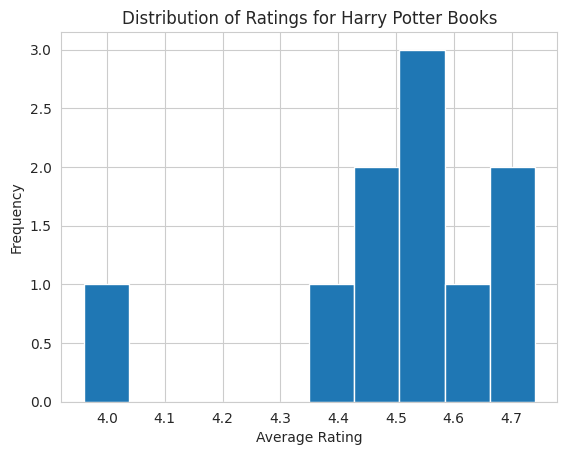

In [58]:
# Analyze the distribution of ratings for the Harry Potter books
harry_potter_books['average_rating'].hist()
plt.title('Distribution of Ratings for Harry Potter Books')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


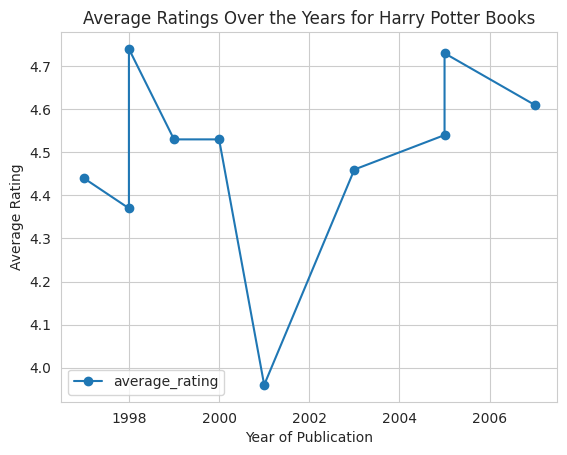

In [59]:
# Plot a line chart to show how the average ratings have changed over the years for the Harry Potter books
harry_potter_books.sort_values('original_publication_year').plot(x='original_publication_year', y='average_rating', marker='o')
plt.title('Average Ratings Over the Years for Harry Potter Books')
plt.xlabel('Year of Publication')
plt.ylabel('Average Rating')
plt.show()


# Find the most selling books within the Harry Potter series

In [67]:
# Identify the most selling book in the series based on ratings count
harry_potter_books[['title', 'ratings_count']].sort_values(by='ratings_count', ascending=False)

,title,ratings_count
1,Harry Potter and the Sorcerer's Stone (Harry P...,4602479
6,Harry Potter and the Prisoner of Azkaban (Harr...,1832823
9,Harry Potter and the Chamber of Secrets (Harry...,1779331
10,Harry Potter and the Goblet of Fire (Harry Pot...,1753043
11,Harry Potter and the Deathly Hallows (Harry Po...,1746574
8,Harry Potter and the Order of the Phoenix (Har...,1735368
12,Harry Potter and the Half-Blood Prince (Harry ...,1678823
96,"Harry Potter Boxset (Harry Potter, #1-7)",190050
613,"Harry Potter Collection (Harry Potter, #1-6)",24618
1036,The Magical Worlds of Harry Potter: A Treasury...,13820


In [68]:
most_selling_book = harry_potter_books.loc[harry_potter_books['ratings_count'].idxmax()]

print("Most selling Harry Potter book based on ratings count:")
print(most_selling_book)

Most selling Harry Potter book based on ratings count:
book_id                                                                      2
goodreads_book_id                                                            3
best_book_id                                                                 3
work_id                                                                4640799
books_count                                                                491
isbn                                                                 439554934
isbn13                                                         9780439554930.0
authors                                            J.K. Rowling, Mary GrandPré
original_publication_year                                               1997.0
original_title                        Harry Potter and the Philosopher's Stone
title                        Harry Potter and the Sorcerer's Stone (Harry P...
language_code                                                              e